In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 模擬版資料做SVM

In [16]:
x = np.array([[6, 6], [10, 8], [3, 7], [8, 7]])

In [17]:
x

array([[ 6,  6],
       [10,  8],
       [ 3,  7],
       [ 8,  7]])

In [13]:
#所有因子的前者
x[:,0]

array([ 6, 10,  3,  8])

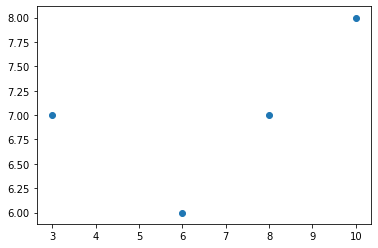

In [18]:
#前者當橫軸，後者當縱軸
plt.scatter(x[:,0], x[:,1])

In [15]:
y = np.array([1, 2, 1, 2])

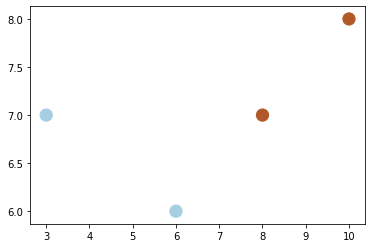

In [25]:
#c=y 以類別當顏色
#cmap 選顏色集
#s 決定點大小
plt.scatter(x[:,0], x[:,1], c=y, cmap="Paired", s=150)

## Step1. 打開函數學習機

In [26]:
from sklearn.svm import SVC

In [30]:
#gamma="auto" 讓下面學習時不出現警告
clf = SVC(gamma="auto")

## Step2. 學習

In [31]:
clf.fit(x, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Step3. 預測

In [36]:
y_predict = clf.predict(x)

In [37]:
#預測結果
y_predict

array([1, 2, 1, 2])

In [38]:
#與原本的y完全相符
y

array([1, 2, 1, 2])

In [41]:
#用隨機亂數生成點
xr = np.random.rand(100)*7 +3
yr = np.random.rand(100)*2 +6

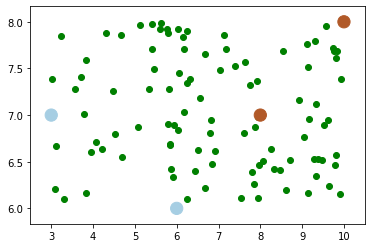

In [49]:
#丟進模型預測
plt.scatter(xr, yr, c="g")
plt.scatter(x[:,0], x[:,1], c=y, cmap="Paired", s=150)

In [46]:
#列印出前五個X跟Y
print("X", xr[:5])
print("Y", yr[:5])

X [9.51338974 6.66965131 7.02403016 7.86090066 9.11258996]
Y [6.89426496 6.22283629 7.48187282 6.86882804 7.76349359]


In [48]:
#用np.c_把兩個list合併
X = np.c_[xr,yr]

In [50]:
Y = clf.predict(X)

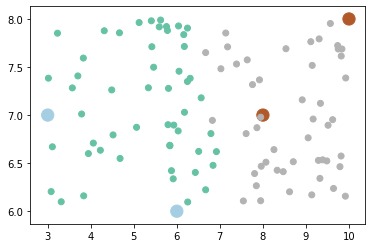

In [54]:
plt.scatter(x[:,0], x[:,1], c=y, cmap="Paired", s=150) #原來的資料
plt.scatter(X[:,0], X[:,1], c=Y, cmap="Set2") #亂數預測的點(小)

## 結果呈現

In [67]:
x_list = np.linspace(3, 10, 50)
y_list = np.linspace(6, 8, 50)

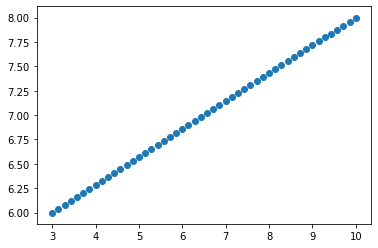

In [68]:
#Fail版本：各項x,y結合會變成線性關係
X = np.c_[x_list, y_list]
plt.scatter(X[:,0], X[:,1])

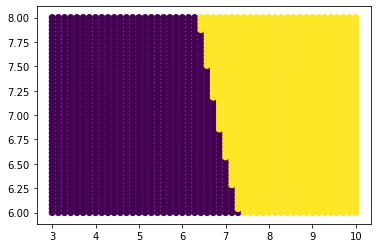

In [66]:
X, Y = np.meshgrid(x_list, y_list) #把兩個list用meshgrid做成矩陣
P = np.c_[X.ravel(), Y.ravel()] #把兩個list拉平後組合起來
C = clf.predict(P) #把P丟進clf預測
plt.scatter(P[:,0], P[:,1], c=C) #畫圖

## 插播：contour用法

In [69]:
xL = np.array([1,2,3,4])
yL = np.array([5,6,7,8])
X, Y = np.meshgrid(xL, yL)

In [70]:
X

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [71]:
Y

array([[5, 5, 5, 5],
       [6, 6, 6, 6],
       [7, 7, 7, 7],
       [8, 8, 8, 8]])

In [72]:
Z = np.random.randint(1,3,(4,4))

In [73]:
Z

array([[2, 1, 1, 1],
       [2, 2, 2, 1],
       [2, 2, 2, 1],
       [1, 1, 1, 1]])

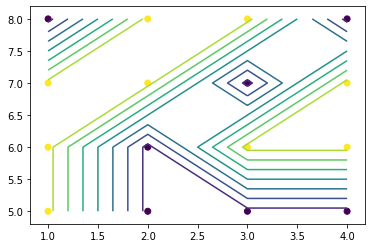

In [80]:
Z = np.random.randint(1,3,(4,4))
plt.contour(X,Y,Z) #等高線原理：把同維度的Z點相連，順便自動補上中間層
plt.scatter(X.ravel(), Y.ravel(), c=Z.ravel()) #X.Y.Z拉平降維度，用Z當顏色

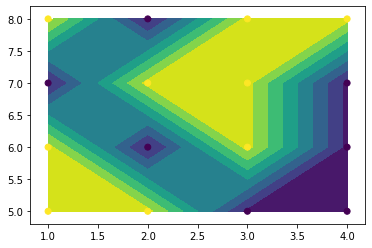

In [81]:
Z = np.random.randint(1,3,(4,4))
plt.contourf(X,Y,Z) #contourf 把連線填滿
plt.scatter(X.ravel(), Y.ravel(), c=Z.ravel())

## 資料視覺化終極版

In [90]:
x_arr = np.arange(2.5, 10.5, 0.02) #把點再切的更細一些
y_arr = np.arange(5.5, 8.5, 0.02)

X,Y = np.meshgrid(x_arr, y_arr)
P = np.c_[X.ravel(), Y.ravel()]

z = clf.predict(P)
Z = z.reshape(X.shape) #把z用X的型態reshape

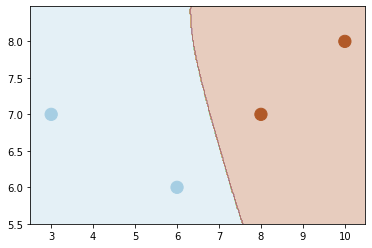

In [96]:
plt.contourf(X,Y,Z, cmap="Paired", alpha=0.3) #用alpha調透明度
plt.scatter(x[:,0], x[:,1], c=y, cmap="Paired", s=150) #原始的輸入與輸出

## 實例：鳶尾花數據庫

In [109]:
from sklearn.datasets import load_iris

In [113]:
iris = load_iris()

In [114]:
#印出Data資訊
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [117]:
x = iris.data
y = iris.target

In [118]:
#前五筆資料(x)
x[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [120]:
#前五筆資料(y)
y[:5]

array([0, 0, 0, 0, 0])

In [121]:
X = x[:, :2]

In [122]:
Y = y

In [123]:
len(X)

150

## 區分訓練資料、測試資料

In [124]:
from sklearn.model_selection import train_test_split

In [126]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,
                                                   test_size = 0.2,
                                                   random_state = 0)

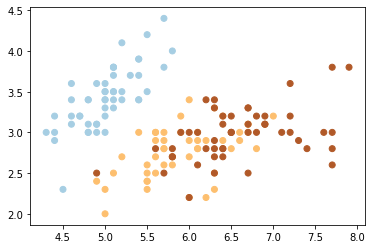

In [127]:
plt.scatter(X[:,0], X[:,1], c=Y, cmap="Paired")

### Step1. 開一台函數學習機

In [128]:
clf = SVC(gamma="auto")

### Step2. 訓練

In [129]:
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Step3. 預測

In [130]:
y_predict = clf.predict(x_test)

In [131]:
y_predict

array([1, 1, 0, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 1, 0])

In [132]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [133]:
y_predict - y_test

array([-1,  0,  0,  0,  0,  0,  0,  1,  1,  1, -1,  1,  1,  1,  1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  1,  0,  0])

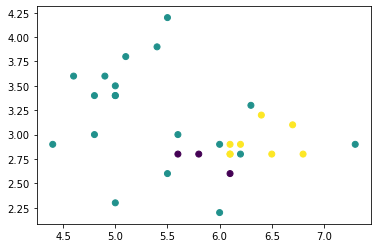

In [134]:
plt.scatter(x_test[:,0], x_test[:,1], c=y_predict-y_test)

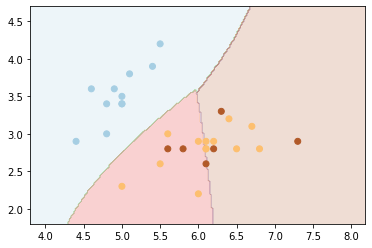

In [139]:
x0 = np.arange(3.8, 8.2, 0.02)
y0 = np.arange(1.8, 4.7, 0.02)

xm, ym = np.meshgrid(x0, y0)
P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)

Z = z.reshape(xm.shape)
plt.contourf(xm, ym, Z, cmap="Paired", alpha=0.2)

plt.scatter(x_test[:,0], x_test[:,1], cmap="Paired", 
           c= y_test)

In [ ]:
##作業：可以選後兩個變數/變數全選